### Import packages and Dataset

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
#import Data set
df_diabetes = pd.read_csv("diabetes.csv", header = 0)
df_dibcpy=df_diabetes.copy()


### Statistical review of Data set

In [3]:
profile = ProfileReport(df_diabetes)
profile.to_file('df_diabetes_report.html')

In [4]:
profile

In [5]:
df_diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Correlation against target variable

In [6]:
correlations = df_diabetes.corr()
correlations['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

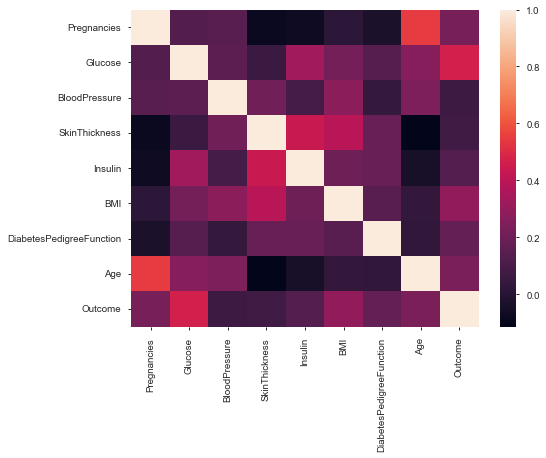

In [7]:
plt.figure(figsize=(8, 6), dpi=70)
sns.heatmap(correlations);

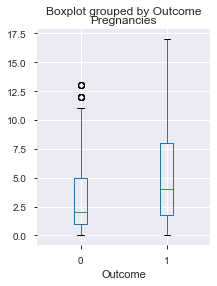

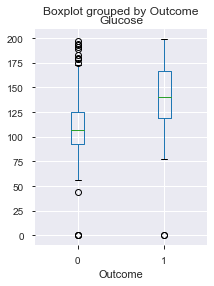

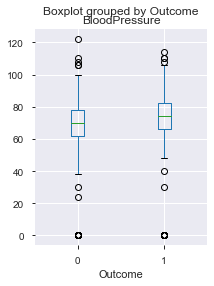

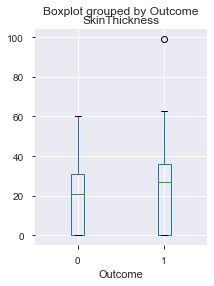

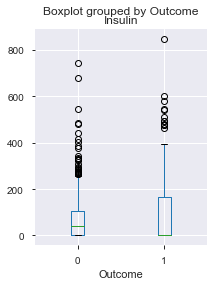

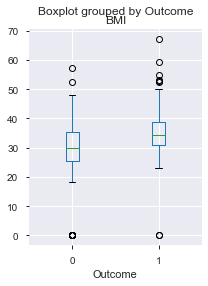

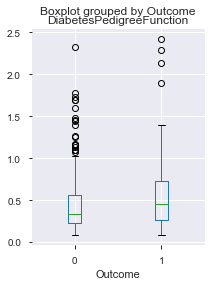

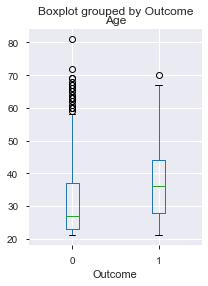

In [8]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
label = 'Outcome'

X, y = df_diabetes[features].values, df_diabetes[label].values
for col in features:
    df_diabetes.boxplot(column = col, by='Outcome', figsize = (3,4))

## Preprocessing
### Replace zero values with corrosponding mean values
* Take mean value of insulin (non-diabates patients and  non zero insulin value records) 
* Take mean value of insulin (diabates patients and  non zero insulin value records) 
* Take mean value of SkinThickness (non-diabates patients and  non zero SkinThickness value records) 
* Take mean value of SkinThickness (diabates patients and  non zero SkinThickness value records) 

In [9]:
rslt_df_0_insulin = df_dibcpy[(df_dibcpy['Outcome'] == 0) & (df_dibcpy['Insulin']!=0)] 
rslt_df_1_insulin = df_dibcpy[(df_dibcpy['Outcome'] == 1) & (df_dibcpy['Insulin']!=0)] 

rslt_df_0_SkinThickness = df_dibcpy[(df_dibcpy['Outcome'] == 0) & (df_dibcpy['SkinThickness']!=0)] 
rslt_df_1_SkinThickness = df_dibcpy[(df_dibcpy['Outcome'] == 1) & (df_dibcpy['SkinThickness']!=0)] 

rslt_df_0_BloodPressure = df_dibcpy[(df_dibcpy['Outcome'] == 0) & (df_dibcpy['BloodPressure']!=0)] 
rslt_df_1_BloodPressure = df_dibcpy[(df_dibcpy['Outcome'] == 1) & (df_dibcpy['BloodPressure']!=0)] 

rslt_df_0_BMI = df_dibcpy[(df_dibcpy['Outcome'] == 0) & (df_dibcpy['BMI']!=0)] 
rslt_df_1_BMI = df_dibcpy[(df_dibcpy['Outcome'] == 1) & (df_dibcpy['BMI']!=0)] 

In [10]:
rslt_df_0_insulin['Insulin'].mean(),rslt_df_1_insulin['Insulin'].mean(),rslt_df_0_SkinThickness['SkinThickness'].mean(),rslt_df_1_SkinThickness['SkinThickness'].mean()

(130.28787878787878, 206.84615384615384, 27.235457063711912, 33.0)

### Update zero values with mean values

In [11]:
df_diabetes['Insulin'] = np.where((df_diabetes['Insulin'] == 0) & (df_diabetes['Outcome'] == 0), rslt_df_0_insulin['Insulin'].mean(), df_diabetes['Insulin'])
df_diabetes['Insulin'] = np.where((df_diabetes['Insulin'] == 0) & (df_diabetes['Outcome'] == 1), rslt_df_1_insulin['Insulin'].mean(), df_diabetes['Insulin'])

df_diabetes['SkinThickness'] = np.where((df_diabetes['SkinThickness'] == 0) & (df_diabetes['Outcome'] == 1), rslt_df_1_SkinThickness['SkinThickness'].mean(), df_diabetes['SkinThickness'])
df_diabetes['SkinThickness'] = np.where((df_diabetes['SkinThickness'] == 0) & (df_diabetes['Outcome'] == 0), rslt_df_0_SkinThickness['SkinThickness'].mean(), df_diabetes['SkinThickness'])

df_diabetes['BloodPressure'] = np.where((df_diabetes['BloodPressure'] == 0) & (df_diabetes['Outcome'] == 0), rslt_df_0_BloodPressure['BloodPressure'].mean(), df_diabetes['BloodPressure'])
df_diabetes['BloodPressure'] = np.where((df_diabetes['BloodPressure'] == 0) & (df_diabetes['Outcome'] == 1), rslt_df_1_BloodPressure['BloodPressure'].mean(), df_diabetes['BloodPressure'])

df_diabetes['BMI'] = np.where((df_diabetes['BMI'] == 0) & (df_diabetes['Outcome'] == 0), rslt_df_0_BMI['BMI'].mean(), df_diabetes['BMI'])
df_diabetes['BMI'] = np.where((df_diabetes['BMI'] == 0) & (df_diabetes['Outcome'] == 1), rslt_df_1_BMI['BMI'].mean(), df_diabetes['BMI'])

### compare previous and current statistics
* check standerd diviation is reduced

In [12]:
df_dibcpy.describe().loc[['std']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.88416,0.331329,11.760232,0.476951


In [13]:
df_diabetes.describe().loc[['std']]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
std,3.369578,31.972618,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951


In [14]:
correlations = df_diabetes.corr()
correlations_pre = df_dibcpy.corr()
correlations_pre['Outcome'],correlations['Outcome']


(Pregnancies                 0.221898
 Glucose                     0.466581
 BloodPressure               0.065068
 SkinThickness               0.074752
 Insulin                     0.130548
 BMI                         0.292695
 DiabetesPedigreeFunction    0.173844
 Age                         0.238356
 Outcome                     1.000000
 Name: Outcome, dtype: float64,
 Pregnancies                 0.221898
 Glucose                     0.466581
 BloodPressure               0.175087
 SkinThickness               0.308094
 Insulin                     0.410918
 BMI                         0.315271
 DiabetesPedigreeFunction    0.173844
 Age                         0.238356
 Outcome                     1.000000
 Name: Outcome, dtype: float64)

<AxesSubplot:>

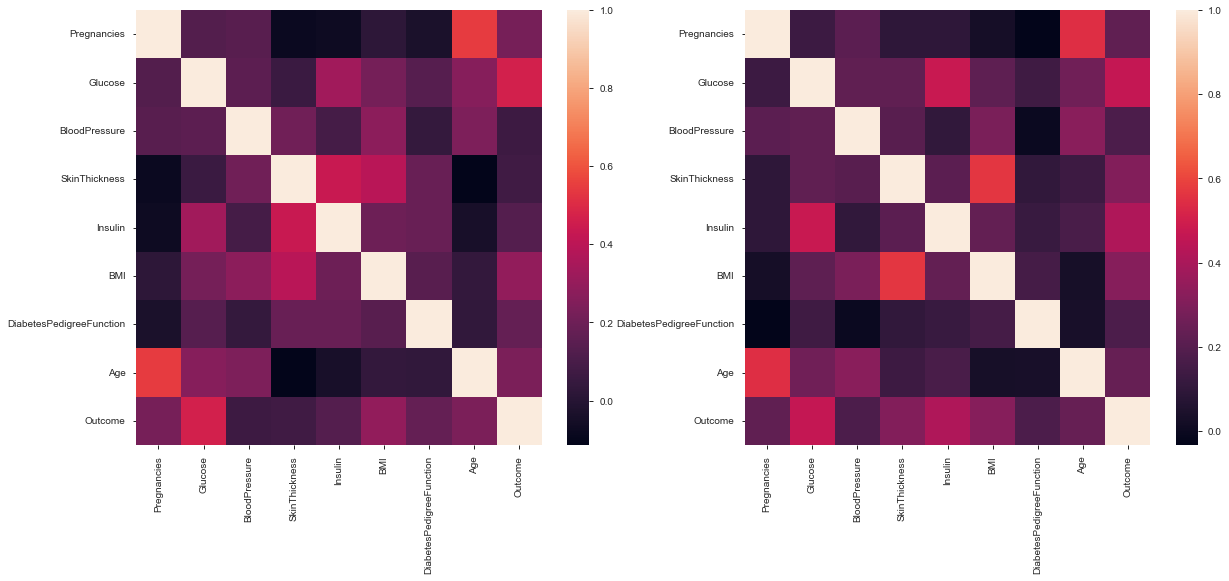

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
sns.heatmap(correlations_pre, ax=ax1)
sns.heatmap(correlations, ax=ax2)

In [16]:
profile_new = ProfileReport(df_diabetes)
profile_new.to_file('df_diabetes_new_report.html')

In [17]:
profile_new

### Scale data to normalaize and Split Train and Test data

In [18]:
scaler=MinMaxScaler(feature_range=(-1,1))
#Scale only features, skip outcome
diabetes_scaler=scaler.fit_transform(np.array(df_diabetes.iloc[:,:8]))

#split 80% 20%
training_size=int(len(diabetes_scaler)*0.8)
test_size=len(diabetes_scaler)-training_size
#Make X_train and y_train
X_train_data,Y_test_data=diabetes_scaler[0:training_size],diabetes_scaler[training_size:len(diabetes_scaler)]
X_train, X_test, y_train, y_test =diabetes_scaler[0:training_size],diabetes_scaler[training_size:len(diabetes_scaler)],df_diabetes.iloc[0:training_size,8],df_diabetes.iloc[training_size:len(diabetes_scaler),8]

In [19]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [20]:
np.linalg.det(X_train.T.dot(X_train))

251384087409870.3

In [21]:
weights = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
weights

array([ 0.08446907,  0.7693923 ,  0.08942157, -0.19986471, -0.16436422,
        0.28755015, -0.09114932, -0.08050268])

## Perseptron Implementation

In [22]:
def predict(weights,bias,xTest):
    linear_output = np.dot(xTest, weights) + bias
    y_predicted = activation(linear_output)
    return y_predicted   

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def activation(x):
    return np.where(x >= 0.0 , 1, 0)

## Perseptron with weights initialize as 0's

In [23]:
def Modelfit(xTrain,yTrain,bias,leaningrate,epochs):
    n_samples, n_features = xTrain.shape
    weights = np.zeros(n_features)       
    bias = bias
    for i in range(epochs):        
        for idx, x_i in enumerate(xTrain):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = activation(linear_output)
            update = leaningrate* (yTrain[idx] - y_predicted)
            weights += update * x_i
            bias += update            
    return weights,bias

Wight_new,bias_update=Modelfit(X_train, y_train,0.9,0.1,100)
predictions = predict(Wight_new,bias_update,X_test)
acc=accuracy(y_test, predictions)
acc


0.7402597402597403

### Weights Update Experiment
* weight array with correlation values

In [24]:
def Modelfit(xTrain,yTrain,bias,leaningrate,epochs):
    n_samples, n_features = X.shape    
    weights =[0.2,0.4,0.1,0.3,0.4,0.3,0.1,0.2] 
    # weights = np.linalg.inv(xTrain.T.dot(xTrain)).dot(xTrain.T).dot(yTrain)       
    bias = bias
    for i in range(epochs):        
        for idx, x_i in enumerate(xTrain):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = activation(linear_output)
            update = leaningrate* (yTrain[idx] - y_predicted)
            weights += update * x_i
            bias += update            
    return weights,bias

Wight_new,bias_update=Modelfit(X_train, y_train,0.9,0.1,100)
predictions = predict(Wight_new,bias_update,X_test)
acc=accuracy(y_test, predictions)
acc

0.7857142857142857

### Bias remove from linear output value (without bias)

In [25]:
def Modelfit(xTrain,yTrain,bias,leaningrate,epochs):
    n_samples, n_features = xTrain.shape     
    weights =[0.2,0.4,0.1,0.3,0.4,0.3,0.1,0.2]
    # weights = np.zeros(n_features)       
    bias = bias
    for i in range(epochs):        
        for idx, x_i in enumerate(xTrain):
            linear_output = np.dot(x_i, weights) 
            y_predicted = activation(linear_output)
            update = leaningrate* (yTrain[idx] - y_predicted)
            weights += update * x_i
            # bias += update            
    return weights,bias

Wight_new,bias_update=Modelfit(X_train, y_train,0.9,0.19,100)
predictions = predict(Wight_new,0.0,X_test)
acc=accuracy(y_test, predictions)
acc

0.7857142857142857

### Remove Bias Update 

In [26]:
def Modelfit(xTrain,yTrain,bias,leaningrate,epochs):
    n_samples, n_features = xTrain.shape
    # weights = np.zeros(n_features) 
    weights =[0.2,0.4,0.1,0.3,0.4,0.3,0.1,0.2]      
    bias = bias
    for i in range(epochs):        
        for idx, x_i in enumerate(xTrain):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = activation(linear_output)
            update = leaningrate* (yTrain[idx] - y_predicted)
            weights += update * x_i
            # bias += update            
    return weights,bias

Wight_new,bias_update=Modelfit(X_train, y_train,0.9,0.19,100)
predictions = predict(Wight_new,0.885,X_test)
acc=accuracy(y_test, predictions)
acc

0.8051948051948052

### Make All-together with learning rate 0.19 and bias initial with 0.9 and iteration 100

In [27]:
def Modelfit(xTrain,yTrain,bias,leaningrate,epochs):
    n_samples, n_features = xTrain.shape
    # weights = np.zeros(n_features) 
    weights =[0.2,0.4,0.1,0.3,0.4,0.3,0.1,0.2]      
    bias = bias
    for i in range(epochs):        
        for idx, x_i in enumerate(xTrain):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = activation(linear_output)
            update = leaningrate* (yTrain[idx] - y_predicted)
            weights += update * x_i
            bias += update            
    return weights,bias
Wight_new,bias_update=Modelfit(X_train, y_train,0.9,0.19,100)
predictions = predict(Wight_new,0.9,X_test)
acc=accuracy(y_test, predictions)
acc

0.8311688311688312

### Iteration changed to 50

In [28]:
def Modelfit(xTrain,yTrain,bias,leaningrate,epochs):
    n_samples, n_features = xTrain.shape
    # weights = np.zeros(n_features) 
    weights =[0.2,0.4,0.1,0.3,0.4,0.3,0.1,0.2]      
    bias = bias
    for i in range(epochs):        
        for idx, x_i in enumerate(xTrain):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = activation(linear_output)
            update = leaningrate* (yTrain[idx] - y_predicted)
            weights += update * x_i
            bias += update            
    return weights,bias
Wight_new,bias_update=Modelfit(X_train, y_train,0.9,0.19,50)
predictions = predict(Wight_new,0.9,X_test)
acc=accuracy(y_test, predictions)
acc

0.7792207792207793

In [282]:
def Modelfit(xTrain,yTrain,bias,leaningrate,epochs):
    n_samples, n_features = xTrain.shape
    # weights = np.zeros(n_features) 
    weights =[0.2,0.4,0.1,0.3,0.4,0.3,0.1,0.2]      
    bias = bias
    for i in range(epochs):        
        for idx, x_i in enumerate(xTrain):
            linear_output = np.dot(x_i, weights) + bias
            y_predicted = activation(linear_output)
            update = leaningrate* (yTrain[idx] - y_predicted)
            weights += update * x_i
            bias += update            
    return weights,bias

### Model trained 50 times by changing learning rate and pick Best model

In [29]:
def start():
    epochs=50
    bias=0.9
    lr=0.01
    iterations=100
    max_acc=0.0
    bestmodel=""
    for a in range(0,epochs):
        
        Wight_new,bias_update=Modelfit(X_train, y_train,bias,lr*a,iterations)
        predictions = predict(Wight_new,bias_update,X_test)
        acc=accuracy(y_test, predictions)
        if acc>max_acc:
            max_acc=acc
            print(str(max_acc))
            bestmodel="epoch "+str(a)+"-"+ str(acc)+"\n learning rate :"+str(lr*a)+"\n weights:"+str(Wight_new)+"\nbias -"+str(bias_update)
    print(bestmodel)   
start()

0.6623376623376623
0.7272727272727273
0.8051948051948052
0.8181818181818182
0.8246753246753247
0.8311688311688312
0.8376623376623377
0.8506493506493507
epoch 43-0.8506493506493507
 learning rate :0.43
 weights:[ 0.45294118  1.96874372 -0.23228937  0.8408792   2.27805868 -0.13856151
  0.24027327  0.34333333]
bias -1.76


### Best Model hyperparamter values
* Learning rate=0.43
* FInal weights= [ 0.45294118  1.96874372 -0.23228937  0.8408792   2.27805868 -0.13856151
  0.24027327  0.34333333]
* Updated Bias=1.76
* Inital Bias=0.9
* Initial weights=[0.2,0.4,0.1,0.3,0.4,0.3,0.1,0.2] 

In [30]:
Wight_new,bias_update=Modelfit(X_train, y_train,0.9,0.43,100)
predictions = predict(Wight_new,bias_update,X_test)
acc=accuracy(y_test, predictions)
acc

0.8506493506493507

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, predictions)
confusion


array([[85, 14],
       [ 9, 46]], dtype=int64)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


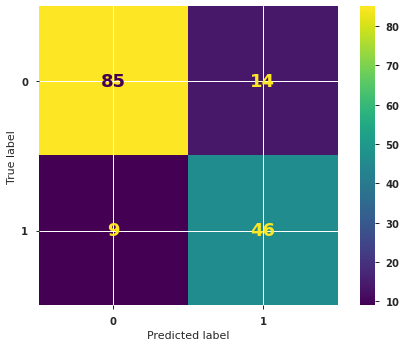

In [32]:
disp = ConfusionMatrixDisplay(confusion)
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 18}
plt.rc('font', **font)
disp.plot()

In [33]:
from sklearn.metrics import classification_report

print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        99
           1       0.77      0.84      0.80        55

    accuracy                           0.85       154
   macro avg       0.84      0.85      0.84       154
weighted avg       0.86      0.85      0.85       154



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


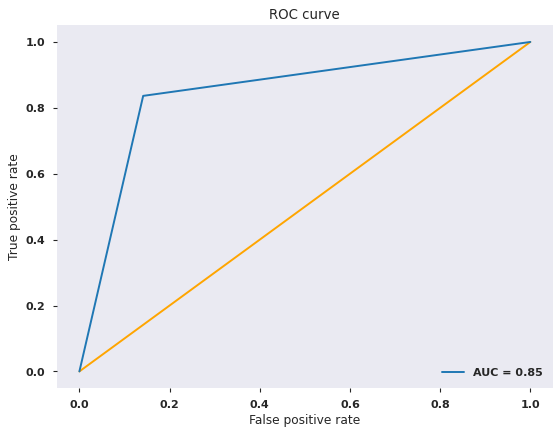

In [34]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, threshold = roc_curve(y_score=predictions, y_true=y_test)
auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6), dpi=80)
ax = sns.lineplot(x=[0,1], y=[0,1], color='orange')
sns.lineplot(x=fpr, y=tpr, label='AUC = {:.2f}'.format(auc), ci=None)
ax.set(xlabel='False positive rate', ylabel='True positive rate', title = 'ROC curve')
plt.legend(loc='lower right')
plt.grid()

### Change precentages of Training and Testing
* Found Best as same above model in 80% 20% Test and Train data 

In [275]:
training_propotion=[0.5,0.6,0.7,0.8,0.9]
for a in training_propotion:
    print("prop:"+str(a))
    training_size=int(len(diabetes_scaler)*a)
    test_size=len(diabetes_scaler)-training_size
    X_train_data,Y_test_data=diabetes_scaler[0:training_size],diabetes_scaler[training_size:len(diabetes_scaler)]
    X_train, X_test, y_train, y_test =diabetes_scaler[0:training_size],diabetes_scaler[training_size:len(diabetes_scaler)],df_diabetes.iloc[0:training_size,8],df_diabetes.iloc[training_size:len(diabetes_scaler),8]

    start()

prop:0.5
0.6588541666666666
0.7526041666666666
0.7786458333333334
0.7838541666666666
0.8125
0.8229166666666666
epoch 23-0.8229166666666666
 learning rate :0.23
 weights:[0.10529412 0.42889447 0.35149223 0.47864266 1.13601701 0.13720083
 0.17011956 0.108     ]
bias -1.1300000000000001
prop:0.6
0.6493506493506493
0.75
0.8246753246753247
0.8311688311688312
epoch 39-0.8311688311688312
 learning rate :0.39
 weights:[3.94117647e-02 1.17412060e+00 1.21936806e-04 1.20071540e+00
 2.22208260e+00 3.58264533e-01 1.38633646e-01 2.91000000e-01]
bias -2.0700000000000003
prop:0.7
0.670995670995671
0.7878787878787878
0.7965367965367965
0.8051948051948052
0.8095238095238095
epoch 36-0.8095238095238095
 learning rate :0.36
 weights:[ 0.58117647  0.60984925  0.16627465  0.89933518  1.60359669 -0.01924856
  0.19960717 -0.16      ]
bias -1.62
prop:0.8
0.6623376623376623
0.7272727272727273
0.8051948051948052
0.8181818181818182
0.8246753246753247
0.8311688311688312
0.8376623376623377
0.8506493506493507
epoch 